# Clustering

In [107]:
import util
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np

conn, cur = util.connexion()

## Etude des corrélations

In [41]:
df = pd.read_sql_query('SELECT titre, public."NbPassagesMC"(titre,current_date), public."NbPassages50"(titre,current_date),	public."NbPassages40"(titre,current_date), public."NbPassages30"(titre,current_date), public."NbPassages20"(titre,current_date), public."NbPassages20k"(titre,current_date) FROM public."Chanson"',con=conn)
df

,titre,NbPassagesMC,NbPassages50,NbPassages40,NbPassages30,NbPassages20,NbPassages20k
0,Pour la peine,0,1,1,2,1,2
1,Tomber dans ses yeux,0,0,0,0,0,0
2,2 be 3,0,3,0,1,0,3
3,Partir un jour,1,0,3,4,2,2
4,Toujours là pour toi,0,2,0,0,2,0
...,...,...,...,...,...,...,...
2200,À corps perdu,0,0,1,0,0,0
2201,Ces gens-là,0,0,0,1,0,0
2202,Il,0,0,0,0,1,0
2203,Va y avoir du sport,0,0,0,0,1,0


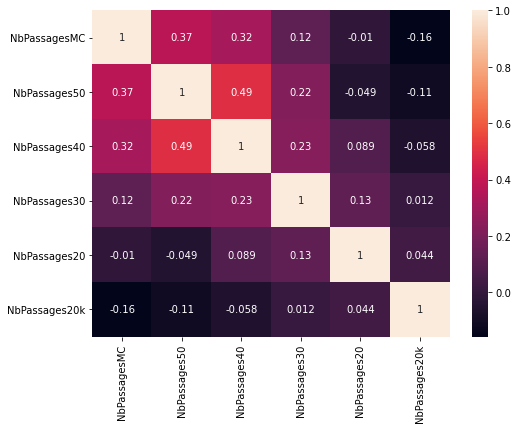

In [42]:
corr_matrix = df.corr(method='pearson')
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True)
plt.show()

## Clustering

### KMeans

In [43]:
titres = ['Envole-moi', 'Allumer le feu', 'Évidemment (France Gall)', 'Au fur et à mesure']
df[df['titre'].isin(titres)]

,titre,NbPassagesMC,NbPassages50,NbPassages40,NbPassages30,NbPassages20,NbPassages20k
746,Au fur et à mesure,1,0,1,0,2,1
846,Évidemment (France Gall),3,0,1,1,1,0
907,Envole-moi,2,4,2,0,0,2
954,Allumer le feu,1,4,3,2,0,0


In [44]:
kmeans = KMeans(n_clusters=3).fit(df[['NbPassagesMC','NbPassages50','NbPassages40','NbPassages30','NbPassages20','NbPassages20k']])
centroids = kmeans.cluster_centers_
print(centroids)


df['cluster'] = kmeans.labels_

for i in range(3):
    nbChansonsCluster = df[df['cluster'] == i]['titre'].count()
    print("Nombre de chansons dans la classe {0} : {1}".format(i, nbChansonsCluster))

df.sample(15)

[[0.13496377 0.28804348 0.4701087  0.77626812 1.06612319 0.26539855]
 [1.88339921 3.47035573 2.71343874 1.75889328 1.04545455 0.61067194]
 [0.1092437  0.43865546 0.72268908 0.9697479  1.1512605  2.91764706]]
Nombre de chansons dans la classe 0 : 1104
Nombre de chansons dans la classe 1 : 506
Nombre de chansons dans la classe 2 : 595


,titre,NbPassagesMC,NbPassages50,NbPassages40,NbPassages30,NbPassages20,NbPassages20k,cluster
921,Puisque tu pars,1,1,0,0,2,0,0
78,Comme ils disent,2,1,2,0,1,2,2
2016,Pas là,0,6,3,2,1,0,1
1561,Au nom de la rose,0,0,0,0,1,4,2
2129,Femme d'aujourd'hui,0,0,0,0,1,0,0
1670,Faut qu'j'travaille,0,0,0,1,1,0,0
990,Quand revient la nuit,0,0,0,1,0,0,0
1491,Et c'est parti,0,1,2,4,2,3,2
597,Prière païenne,0,4,2,0,0,1,1
1524,La voix des sages,0,1,0,2,5,2,2


In [52]:
n = int(input())

kmeans = KMeans(n_clusters=n).fit(df[['NbPassagesMC','NbPassages50','NbPassages40','NbPassages30','NbPassages20','NbPassages20k']])
centroids = kmeans.cluster_centers_
print(centroids)

df['cluster'] = kmeans.labels_



[[0.97767857 5.04464286 2.84821429 1.48660714 0.69196429 0.59821429]
 [0.06469298 0.20723684 0.31030702 0.53070175 0.75986842 0.24122807]
 [0.06976744 0.40310078 0.57364341 0.8003876  0.93992248 3.01937984]
 [0.1849711  1.11849711 1.84971098 2.23988439 2.4132948  0.91040462]
 [3.8115942  2.03381643 2.24637681 1.5410628  1.07729469 0.53623188]]
Nombre de chansons dans la classe 0 : 224
Nombre de chansons dans la classe 1 : 912
Nombre de chansons dans la classe 2 : 516
Nombre de chansons dans la classe 3 : 346
Nombre de chansons dans la classe 4 : 207


,titre,NbPassagesMC,NbPassages50,NbPassages40,NbPassages30,NbPassages20,NbPassages20k,cluster
365,Papayou,0,0,0,0,1,0,1
631,Coco câline,0,1,2,1,5,3,3
1907,Le blues du businessman,3,4,1,3,0,1,4
618,Partir là-bas,0,0,0,1,1,0,1
1040,A toutes les filles,3,0,0,2,2,2,2
274,Les amoureux des bancs publics,0,0,0,1,2,0,1
987,O Carole,0,0,0,0,0,0,1
324,C'est écrit,3,0,0,1,1,0,1
1486,Tatoue-moi,3,5,4,0,0,0,0
1239,Ce mec est too much,0,0,0,1,1,0,1


In [53]:
for i in range(n):
    nbChansonsCluster = df[df['cluster'] == i]['titre'].count()
    print("Nombre de chansons dans la classe {0} : {1}".format(i, nbChansonsCluster))

df.sample(20)

Nombre de chansons dans la classe 0 : 224
Nombre de chansons dans la classe 1 : 912
Nombre de chansons dans la classe 2 : 516
Nombre de chansons dans la classe 3 : 346
Nombre de chansons dans la classe 4 : 207


,titre,NbPassagesMC,NbPassages50,NbPassages40,NbPassages30,NbPassages20,NbPassages20k,cluster
866,Seul,5,4,4,1,1,0,4
373,Bambou,0,0,2,2,2,4,2
1009,Mon amie la rose,0,0,1,1,1,5,2
308,J'te l'dis quand même,2,3,1,3,0,1,4
877,Nicky Larson,0,0,0,0,2,0,1
94,Non je n'ai rien oublié,0,0,2,0,1,1,1
467,"J'ai besoin de toi, j'ai besoin de lui",0,0,0,0,0,0,1
943,Ta main (Grégoire),1,1,3,2,2,0,3
1322,Nue,0,0,1,4,4,0,3
109,Lady Marlène,0,0,2,1,0,0,1


On détermine dans chaque cluster combien il y a de mêmes chansons, de 20k et de random

In [63]:
for c in range(n):
    total = df[df['cluster']==c]['titre'].count()
    mc = df[(df['cluster']==c) & (df['NbPassagesMC'] > 0)]['titre'].count()
    vingtk = df[(df['cluster']==c) & (df['NbPassages20k'] > 0) & (df['NbPassagesMC'] == 0)]['titre'].count()
    reste = df[(df['cluster']==c) & (df['NbPassages20k'] == 0) & (df['NbPassagesMC'] == 0)]['titre'].count()
    print("Pour le cluster {0} qui contient {1} chansons".format(c, total))
    print("Nombre de MC : {0}".format(mc))
    print("Nombre de 20k : {0}".format(vingtk))
    print("Nombre de random : {0}".format(reste))
    print()

Pour le cluster 0 qui contient 224 chansons
Nombre de MC : 93
Nombre de 20k : 70
Nombre de random : 61

Pour le cluster 1 qui contient 912 chansons
Nombre de MC : 41
Nombre de 20k : 203
Nombre de random : 668

Pour le cluster 2 qui contient 516 chansons
Nombre de MC : 23
Nombre de 20k : 493
Nombre de random : 0

Pour le cluster 3 qui contient 346 chansons
Nombre de MC : 46
Nombre de 20k : 171
Nombre de random : 129

Pour le cluster 4 qui contient 207 chansons
Nombre de MC : 207
Nombre de 20k : 0
Nombre de random : 0



### Etude des clusters

346


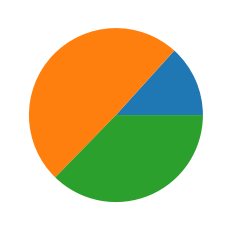

In [100]:
c = int(input())
total = df[df['cluster']==c]['titre'].count()
mc = df[(df['cluster']==c) & (df['NbPassagesMC'] > 0)]['titre'].count()
vingtk = df[(df['cluster']==c) & (df['NbPassages20k'] > 0) & (df['NbPassagesMC'] == 0)]['titre'].count()
reste = df[(df['cluster']==c) & (df['NbPassages20k'] == 0) & (df['NbPassagesMC'] == 0)]['titre'].count()
plt.pie([mc, vingtk, reste])
print(total)
plt.show()

Les mêmes chansons

In [101]:
df[(df['cluster']==c) & (df['NbPassagesMC'] > 0)].sample(10)

,titre,NbPassagesMC,NbPassages50,NbPassages40,NbPassages30,NbPassages20,NbPassages20k,cluster
3,Partir un jour,1,0,3,4,2,2,3
1097,Où sont les femmes,2,1,4,3,2,1,3
1288,Sur un air latino,1,3,2,4,1,0,3
548,Vanina,2,0,0,2,4,0,3
781,Immortelle,1,2,2,4,0,1,3
856,"Poupée de cire, poupée de son",1,1,3,2,0,0,3
145,La nuit je mens,1,0,2,2,2,2,3
1832,Chanson sur ma drôle de vie,3,1,1,6,2,0,3
832,Le poinçonneur des lilas,1,2,1,2,1,1,3
1062,Au soleil,2,2,4,2,3,0,3


Les 20k

In [102]:
df[(df['cluster']==c) & (df['NbPassages20k'] > 0) & (df['NbPassagesMC'] == 0)].sample(10)

,titre,NbPassagesMC,NbPassages50,NbPassages40,NbPassages30,NbPassages20,NbPassages20k,cluster
242,Bruxelles,0,2,2,1,5,1,3
1365,J'me tire,0,1,2,1,3,1,3
355,Ma jolie,0,0,1,3,1,2,3
1128,Garçon,0,1,1,5,1,2,3
1168,Viens viens,0,1,1,2,2,1,3
676,Pas d'ami (comme toi),0,2,1,5,2,1,3
338,C'est quand le bonheur,0,3,0,0,5,1,3
1460,Les poèmes de Michelle,0,0,1,2,3,1,3
1826,Bang bang,0,0,1,2,2,1,3
1334,Le mendiant de l'amour,0,1,4,0,2,2,3


Les random

In [103]:
try:
    df[(df['cluster']==c) & (df['NbPassages20k'] == 0) & (df['NbPassagesMC'] == 0)].sample(10)
    ok = True
except ValueError:
    print("Il n'y a pas de chansons random dans ce cluster")
    ok = False

df[(df['cluster']==c) & (df['NbPassages20k'] == 0) & (df['NbPassagesMC'] == 0)].sample(10)

,titre,NbPassagesMC,NbPassages50,NbPassages40,NbPassages30,NbPassages20,NbPassages20k,cluster
1508,L'amour à la plage,0,1,3,2,4,0,3
700,Si tu m'aimes,0,2,3,4,4,0,3
1845,Rock'n dollars,0,0,1,1,4,0,3
1771,Rien que de l'eau,0,0,2,6,1,0,3
2051,Anissa,0,1,1,3,1,0,3
1974,Hey oh,0,1,1,1,3,0,3
1322,Nue,0,0,1,4,4,0,3
1371,Reste,0,0,1,2,2,0,3
1757,Le lion est mort ce soir,0,0,0,4,1,0,3
1929,Lola,0,1,2,3,3,0,3


In [109]:
prop = np.array([203, 171, 70, 0, 493])
tot = sum(prop)
prop*100/tot

array([21.66488794, 18.24973319,  7.47065101,  0.        , 52.61472785])

## Insertion des clusters en base